# SAT Performance in NYC High Schools - Part 3

In part 3 of this three-part project, I will create several plots of maps that display the following:
- School districts organized based on their SAT Score and Percent ELL Students
- School districts organized based on their SAT Score and Percent White/Asian students
- School districts organized based on their SAT Score and Percent Black/Hispanic students

The main purpose of this exercise is to create inforgraphics that display how high school districts in New York perform on the SAT exam, as well as any demographic information that might contribute to a given district's average score.

The SAT exam is a placement test that American universities use in order to help determine which students to accept. The SAT has three sections, each of which is worth a maximum of 800 points. A high school's average SAT score is also often used as an indicator of the quality of the school's curriculum.

## 1. Setting up the Data

In this section, I will do the following:
- Import and read the dataset
- Group all demographic information for all NYC schools by school district
- Create a function that can be used to generate a plot of maps
- Calculate the means for all of the variables that I will be investigating

First, I will import the appropriate modules and read in the combined dataset that I created in part 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
import re

In [2]:
combined = pd.read_csv("combined.csv")

In [3]:
combined

,DBN,District,School,SAT Score,SAT Test Takers,Percent AP Test Takers,Percent AP Tests Taken,Total Enrollment,Class Size,Percent Male,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent ELL,Teacher Safety,Student Safety,Lat,Lon
0,01M292,1,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,1122,29,30.6,46.7,422,22.6,61.4,1.7,29.1,53.8,14.0,22.3,6.3,6.0,40.7138,-73.9853
1,01M448,1,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,1172,91,9.9,12.4,394,22.2,57.4,2.3,22.6,45.9,29.2,21.1,6.6,6.0,40.7123,-73.9848
2,01M450,1,EAST SIDE COMMUNITY SCHOOL,1149,70,3.2,3.5,598,21.2,54.7,10.4,23.9,55.4,9.7,5.0,7.3,6.6,40.7298,-73.9830
3,01M509,1,MARTA VALLE HIGH SCHOOL,1207,44,35.1,53.7,367,23.6,46.3,1.6,31.6,56.9,9.3,11.2,6.4,6.4,40.7206,-73.9857
4,01M539,1,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",1621,159,15.8,23.4,1613,25.5,49.2,44.9,11.7,14.2,27.8,0.2,7.6,7.3,40.7187,-73.9794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,32K545,32,EBC HIGH SCHOOL FOR PUBLIC SERVICE–BUSHWICK,1154,88,7.8,10.6,606,23.0,52.1,0.7,9.2,88.1,1.7,15.3,5.8,6.4,40.6945,-73.9292
359,32K549,32,BUSHWICK SCHOOL FOR SOCIAL JUSTICE,1035,75,29.7,45.4,434,22.8,48.4,1.8,28.3,68.7,0.5,18.2,7.3,6.5,40.6970,-73.9108
360,32K552,32,ACADEMY OF URBAN PLANNING,1060,67,19.1,25.1,398,23.9,54.5,1.0,26.4,70.4,1.5,23.9,6.4,6.4,40.6970,-73.9108
361,32K554,32,ALL CITY LEADERSHIP SECONDARY SCHOOL,1315,39,2.7,3.0,263,17.8,52.1,1.5,12.9,79.5,5.3,2.7,9.6,8.9,40.6974,-73.9132


### a) Organizing by District

Next, I will group the combined dataset by school district using the District column. After creating the new dataset, I will save it to a csv file. Note that the Latitute and Longitude will be rounded to the nearest ten thousandth's place as this precision is necessary for differentiating locations on a map at this level of zoom. All other columns will be rounded to the nearest tenth's place.

In [4]:
districts = combined.groupby("District").agg(np.mean)
districts.reset_index("District", inplace=True)

rounded_values = ['District', 'SAT Score', 'Percent AP Test Takers',
                  'Percent AP Tests Taken', 'Total Enrollment', 'Class Size',
                  'Percent Male', 'Percent White', 'Percent Black', 'Percent Hispanic',
                  'Percent Asian', 'Percent ELL', 'Teacher Safety', 'Student Safety'
                 ]

# Rounding
districts[rounded_values] = districts[rounded_values].round(1)
districts[["Lon", "Lat"]] = districts[["Lon", "Lat"]].round(4)
districts.head(3)

districts.to_csv('districts.csv', index=False)
districts.head()

,District,SAT Score,Percent AP Test Takers,Percent AP Tests Taken,Total Enrollment,Class Size,Percent Male,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent ELL,Teacher Safety,Student Safety,Lat,Lon
0,1,1354.5,19.2,28.6,668.5,22.7,50.1,18.4,22.3,40.7,17.5,10.0,7.1,6.8,40.7190,-73.9824
1,2,1295.6,26.6,40.1,605.6,25.0,44.7,10.1,24.7,49.6,14.5,13.0,7.4,6.9,40.7397,-73.9914
2,3,1293.3,26.8,40.2,661.4,23.7,48.0,13.7,34.0,44.5,6.4,9.0,6.7,6.7,40.7816,-73.9774
3,4,1224.1,24.7,36.4,569.3,24.1,30.5,1.3,30.0,61.4,6.1,4.6,7.9,6.9,40.7935,-73.9432
4,5,1285.0,16.2,21.8,605.9,24.3,48.5,6.7,49.0,36.2,7.3,4.2,6.9,6.3,40.8171,-73.9492


### b) Map Maker

This function will take in a dependent variable and up to four independent variables and do the following:
- Generate a plot that contains a map of NYC for each of the indepedent variables
- Create a scatterplot of the locations of all the high school districts within NYC
- Hexagons = differences in color represent the range of dependent variable values
- Circles = differences in color the range of independent variable values 

In [5]:
def map_maker(depend_var, *indep_vars):
    
    length = len(indep_vars)
    
    # Size of the plot is determined by number of independent variables
    if length < 3:
        fig_width = length * 8
        fig_height = 10
    else:
        fig_width = 16
        fig_height = 20
    
    fig = plt.figure(figsize=(fig_width, fig_height))

    background = cimgt.Stamen('watercolor')
    
    for sp in range(length):
        current_var = indep_vars[sp]
        
        # Scatterplot orientation is based on number of independent variables
        if length < 2:
            num_wide = 1
            num_tall = 1
        else:
            num_wide = 2
            num_tall = (length + 1) / 2
    
        ax = fig.add_subplot(num_tall, num_wide, sp+1, projection=background.crs)
        ax.set_extent([-74.2, -73.7, 40.5, 40.9]) # Limits the map range to NYC
        ax.add_image(background, 12, zorder = 0) # Adds the watercolor background
        ax.set_title(indep_vars[sp], fontsize=25, pad=10)

        scatter1 = ax.scatter(x=districts["Lon"], 
                              y=districts["Lat"],
                              c=districts[indep_vars[sp]],
                              edgecolor="black",
                              cmap="Greys",
                              s=350,
                              transform=ccrs.PlateCarree())        
        
        scatter2 = ax.scatter(x=districts["Lon"], 
                              y=districts["Lat"],
                              c=districts[depend_var],
                              edgecolor="black",
                              cmap="RdYlBu",
                              marker="H",
                              s=150,
                              transform=ccrs.PlateCarree())

        legend1 = ax.legend(*scatter1.legend_elements(num=8), loc="upper left", fontsize=12, markerscale=2.0, title=indep_vars[sp])
        legend1.get_frame().set_edgecolor('black')
        
        legend2 = ax.legend(*scatter2.legend_elements(num=6), loc="upper right", fontsize=12, markerscale=2.0, title=depend_var)
        legend2.get_frame().set_edgecolor('black')
        
        ax.add_artist(legend1)
        ax.add_artist(legend2)

### c) Calculating Means for Various Demographic Factors

Next, I will calculate the means for SAT Score, Percent ELL Student, Percent White, Percent Asian, Percent Black, and Percent Hispanic for each school district in the dataset. These calculations will enable me to better determine whether certain districts have above or below average scores in these demographics.

In [6]:
SAT_mean = round(districts["SAT Score"].mean(), 1)
ELL_mean = round(districts["Percent ELL"].mean(), 1)
white_mean = round(districts["Percent White"].mean(), 1)
asian_mean = round(districts["Percent Asian"].mean(), 1)
black_mean = round(districts["Percent Black"].mean(), 1)
hispanic_mean = round(districts["Percent Hispanic"].mean(), 1)
teacher_mean = round(districts["Teacher Safety"].mean(), 1)
student_mean = round(districts["Student Safety"].mean(), 1)

print("The average SAT score by school district is {}.".format(SAT_mean))
print("The average percentage of ELL learners by school district is {}%.".format(ELL_mean))
print("The average percentage of white students by school district is {}%.".format(white_mean))
print("The average percentage of Asian students by school district is {}%.".format(asian_mean))
print("The average percentage of black students by school district is {}%.".format(black_mean))
print("The average percentage of Hispanic students by school district is {}%.".format(hispanic_mean))

The average SAT score by school district is 1227.6.
The average percentage of ELL learners by school district is 12.2%.
The average percentage of white students by school district is 9.3%.
The average percentage of Asian students by school district is 11.1%.
The average percentage of black students by school district is 38.9%.
The average percentage of Hispanic students by school district is 39.9%.


In the next section, I will use these means in order to determine which areas are above or below the mean for various demographic values.

## 2. Plots of Maps

I will use the map_maker function to create the following plots:
- School districts organized based on their SAT Score and Percent ELL Students
- School districts organized based on their SAT Score and Percent White/Asian students
- School districts organized based on their SAT Score and Percent Black/Hispanic students

### a) Percent of Students Who Are English Learners by District

First, I will map out the school and school districts in NYC. The colors of the school districts will represent the district's percent of students who are English Language Learners and the colors of the schools wil represent the average SAT Score for that given school.

/opt/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


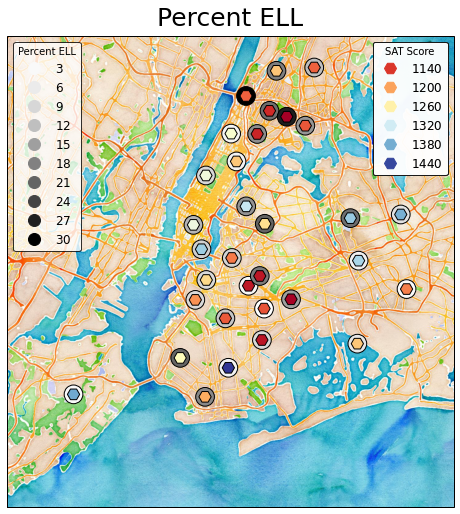

In [7]:
map_maker("SAT Score", "Percent ELL")

Recall that the average SAT score is 1227.6 and the average percentage of ELL students is 12.2%.

The school districts with the highest percentage of ELL students are located in the uppermost part of Manhattan and the Bronx. There is also a sizeable percentage of ELL students in school districts in Broklyn and Queens. For the most part, these districts have average to low SAT scores, although two school districts with at least 18% ELL students have above average SAT scores.

It is noteable that most of the schools with the highest SAT scores (noteably in Staten Island, one district in Broklyn, and northeastern Queens) have a lower percentage of ELL students than average. Considering that two-thirds of the SAT test examines students' English fluency, this is rather unsurprising. 

I hypothsize that most of the districts with a high percentages of ELL students will also have a high percentage of Hispanic students.

### b) Percent of White and Asian Students by Disctrict

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


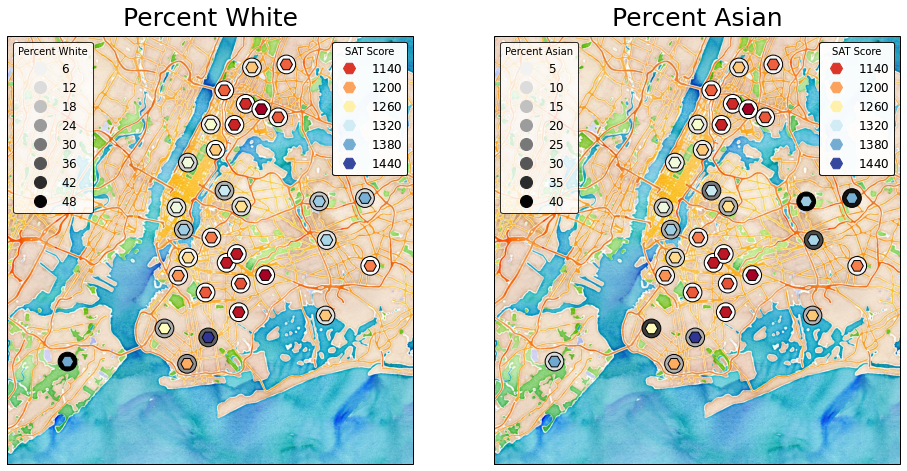

In [8]:
map_maker("SAT Score", "Percent White", "Percent Asian")

Recall that the average SAT score is 1227.6 and that the average district is 9.3% white and 11.1% Asian.

The vast majority of school districts are 10% white or less. The regions with the highest percentage of white students are on Staten Island and in southern Broklyn. These schools districts appear to have average to high SAT scores.

The regions with the highest percentage of Asian students are in northern Queens and southern Broklyn. These school districts also have average to high SAT scores. 

Note that many white and Asian students live in similar neighborhoods, most noteably in southern Broklyn.

### c) Percent of Black and Hispanic Students by Disctrict

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


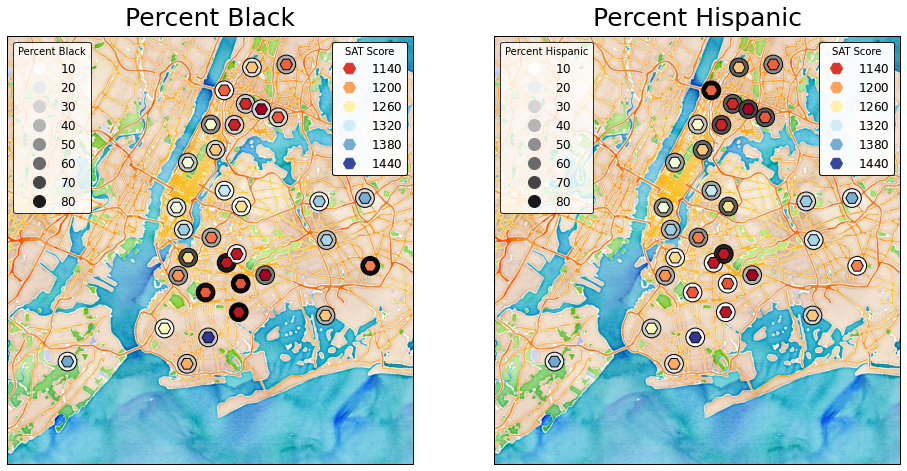

In [9]:
map_maker("SAT Score", "Percent Black", "Percent Hispanic")

Recall that the average SAT score is 1227.6 and that the average district is 38.9% black and 39.9% Hispanic.

The school districts with the highest percentage of black students are in Northern Brooklyn, as well as one district in Queens. These districts have average to below average SAT scores.

The school districts with the highest percentage of Hispanic students are in the Bronx, the northernmost part of Manhattan, and a few neighborhoods in northern Broklyn and eastern Queens.  These districts have average to below average SAT scores. Note that many of these regions (the Bronx in particular) also have a very high number of ELL learners. Thus, it's reasonable to assume that many of these neighborhoods speak Spanish, thus making it more difficult for these students to learn English.

## 3. Results

In New York City, the various races appear to live in different neighborhoods. Here are where the majority of students from each race are located in NYC:
- White Students = high concentrations on Staten Island and in southern Broklyn
- Asian Students = high concentrations in Queens (esp. northeastern Queens) and southern Broklyn
- Black Students = very high concentrations in northern Broklyn and one district in eastern Queens
- Hispanic Students = very high concentrations in the Bronx, northmost Manhattan, and some neighborhoods in northern Broklyn and eastern Queens

Unsurprisingly, most of the Hispanic neighborhoods have a high number of ELL students. These neighborhoods also tend to have lower than average SAT scores. However, there is a very noteable outlier in northeastern Queens. This school district has a SAT score that is around 100 points above average. Additionally, it has a relatively small percentage of Hispanic students (less than 30%), a relatively large percentage of Asian students (around 40%), and at least 21% of its students are in the ELL program. Perhaps there are a few Asian communities in NYC that also struggle with English fluency due to a high number of immigrants.

The racial divide between communities in NYC could partially be contributing to the fact that white and Asian students score significantly higher on the SAT than black and Hispanic students do. In the United States, the school's budget is largely determined by the annual income of the neighborhoods in which the schools reside. Therefore, perhaps white and Asian students are receiving access to the best schools because they live in wealthier neighborhoods.

However, there is one issue that I have yet to discuss that is possibly more striking than anything else I have mentioned in this project. While the average SAT score amongst NYC school districts in this dataset is 1227.6, the national average on the SAT exam (as of 2011) is 1500, as can be seen in the article [here](https://www.studypoint.com/ed/average-sat-scores/.). This means the average SAT score in New York City is over 250 points below average, and that not a single school district in NYC performs above the national average. Perhaps the main problem has more to do with the manner in which the NYC school districts manage their students than any demographic factor analyzed in this project.